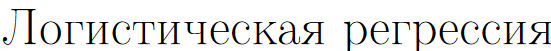

In [104]:
import pandas as pd
import numpy as np
from sklearn.metrics import roc_auc_score
from typing import Tuple

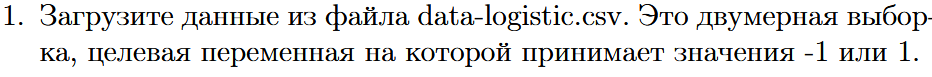

In [105]:
data = pd.read_csv("data-logistic.csv", header=None)
y = data[0]
X = data.loc[:, 1:]

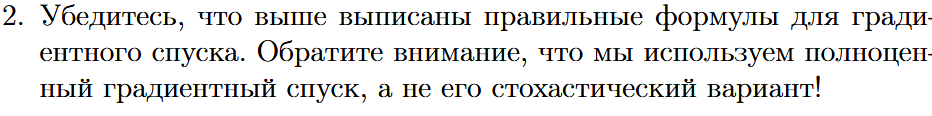

In [133]:
def log_regression(X, y,C,k=0.1, max_iter=10000, tol=1e-5):
    l = len(y)
    w=np.array([0.0, 0.0])
    for _ in range(max_iter):
        old_w = np.copy(w)
        z = y * np.dot(X, w)
        sigmoid = 1 / (1 + np.exp(-z))
        grad = (1 / l) * np.dot(X.T, y * (1 - sigmoid))
        w += k * grad - k * C * w
        
        if np.linalg.norm(w - old_w) < tol:
            break
            
    return w

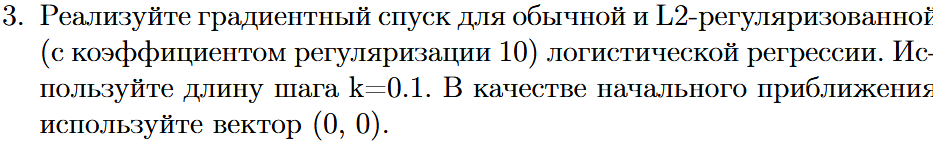

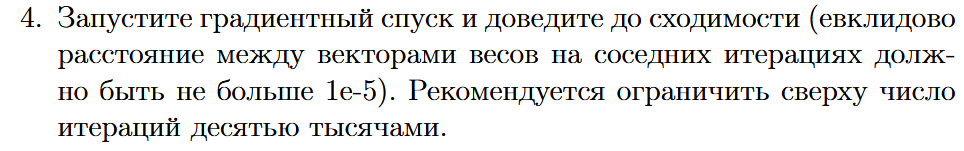

In [134]:
# без регуляризации
w_no_reg = log_regression(X, y, C=0)
w_no_reg

array([0.28781162, 0.0919833 ])

In [135]:
# с L2-регуляризацией
w_with_reg = log_regression(X, y, C=10)
w_with_reg

array([0.02855875, 0.02478014])

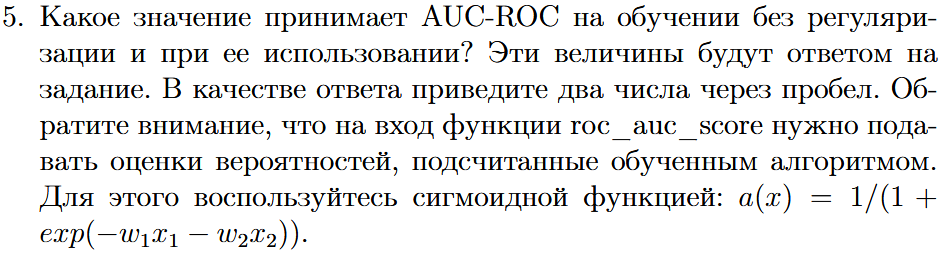

In [136]:
# функция сигмоиды
def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

In [137]:
# вероятности
def predict_p(X, w):
    return sigmoid(np.dot(X, w))

In [138]:
no_reg = predict_p(X, w_no_reg)
with_reg = predict_p(X, w_with_reg)

In [139]:
auc_no_reg = roc_auc_score(y, no_reg)
auc_with_reg = roc_auc_score(y, with_reg)

print("AUC-ROC без регуляризации:", auc_no_reg)
print("AUC-ROC с L2-регуляризацией:", auc_with_reg)

AUC-ROC без регуляризации: 0.9268571428571428
AUC-ROC с L2-регуляризацией: 0.9362857142857142


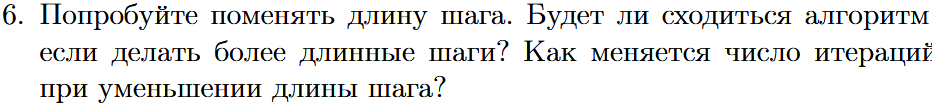

## Увеличение длины шага

In [147]:
w_no_reg_small_k = log_regression(X, y, k=0.19, C=0)
w_reg_small_k = log_regression(X, y, k=0.19, C=10)

pred_no_reg = sigmoid(np.dot(X, w_no_reg_small_k))
pred_reg = sigmoid(np.dot(X, w_reg_small_k))

# Вычисление AUC-ROC
auc_no_reg = roc_auc_score(y, pred_no_reg)
auc_reg = roc_auc_score(y, pred_reg)
print(f'AUC без регуляризации: {auc_no_reg}')
print(f'AUC с регуляризацией: {auc_reg}')

AUC без регуляризации: 0.9267619047619047
AUC с регуляризацией: 0.935142857142857


## Уменьшение длины шага

In [141]:
w_no_reg_small_k = log_regression(X, y, k=0.01, C=0)
w_reg_small_k = log_regression(X, y, k=0.01, C=10)

pred_no_reg = sigmoid(np.dot(X, w_no_reg_small_k))
pred_reg = sigmoid(np.dot(X, w_reg_small_k))

# Вычисление AUC-ROC
auc_no_reg = roc_auc_score(y, pred_no_reg)
auc_reg = roc_auc_score(y, pred_reg)
print(f'AUC без регуляризации: {auc_no_reg}')
print(f'AUC с регуляризацией: {auc_reg}')

AUC без регуляризации: 0.927142857142857
AUC с регуляризацией: 0.9362857142857142


Не влияет 

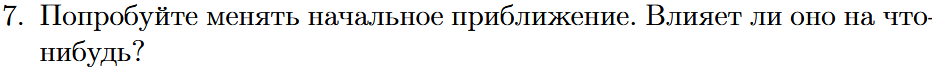

In [144]:

def log_regression(X, y,C,k=0.1, max_iter=10000, tol=1e-5):
    l = len(y)
    w = np.array([1.0, 1.0])
    for _ in range(max_iter):
        old_w = np.copy(w)
        z = y * np.dot(X, w)
        sigmoid = 1 / (1 + np.exp(-z))
        grad = (1 / l) * np.dot(X.T, y * (1 - sigmoid))
        w += k * grad - k * C * w
        
        if np.linalg.norm(w - old_w) < tol:
            break
            
    return w
w_no_reg_small_k = log_regression(X, y, k=0.1, C=0)
w_reg_small_k = log_regression(X, y, k=0.1, C=10)

pred_no_reg = sigmoid(np.dot(X, w_no_reg_small_k))
pred_reg = sigmoid(np.dot(X, w_reg_small_k))

# Вычисление AUC-ROC
auc_no_reg = roc_auc_score(y, pred_no_reg)
auc_reg = roc_auc_score(y, pred_reg)
print(f'AUC без регуляризации: {auc_no_reg}')
print(f'AUC с регуляризацией: {auc_reg}')

AUC без регуляризации: 0.9268571428571428
AUC с регуляризацией: 0.9362857142857142


Изменение начального приближение не повлияло на изменение AUC.